In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

# UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='EstimatedSalary'>

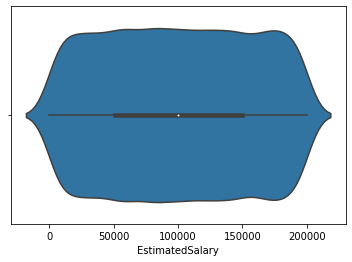

In [14]:
sns.violinplot(x="EstimatedSalary", data=df)

<AxesSubplot:xlabel='Balance', ylabel='Density'>

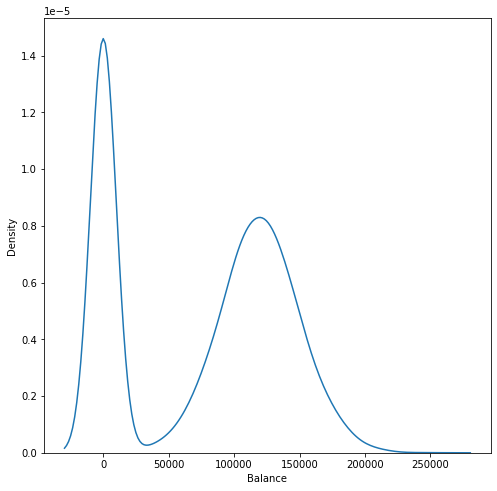

In [19]:
plt.figure(figsize=(8,8))
sns.kdeplot(x=df['Balance'])

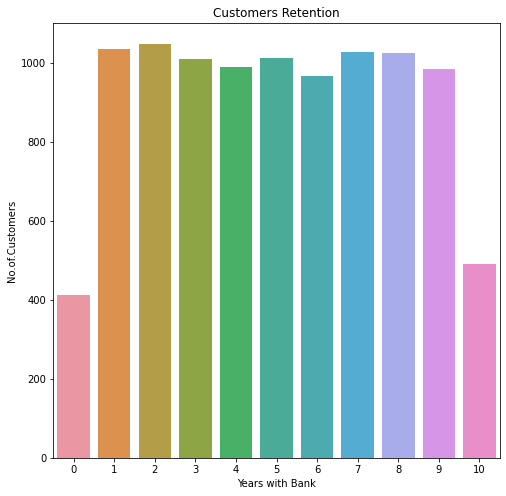

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(x='Tenure',data=df)
plt.xlabel('Years with Bank')
plt.ylabel('No.of.Customers')
plt.title("Customers Retention")
plt.show()

<AxesSubplot:xlabel='CreditScore'>

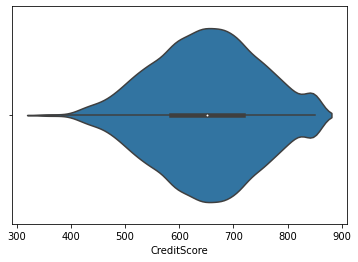

In [22]:
sns.violinplot(x="CreditScore", data=df)

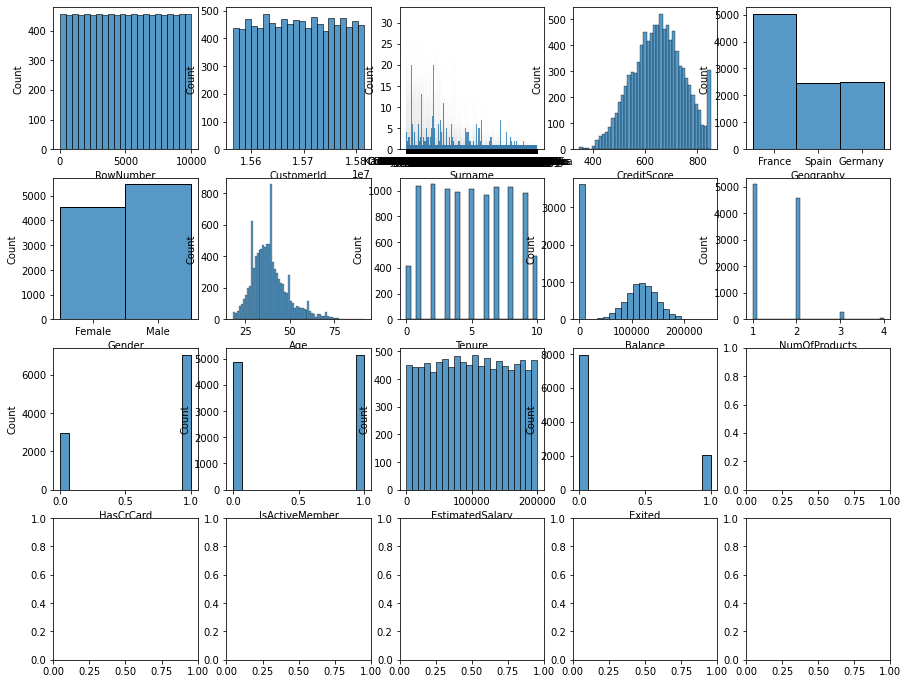

In [26]:
fig, ax = plt.subplots(4, 5, figsize=(15, 12))
for variable, subplot in zip(df.columns, ax.flatten()):
  sns.histplot(df[variable], ax=subplot)

# BIVARIATE ANALYSIS

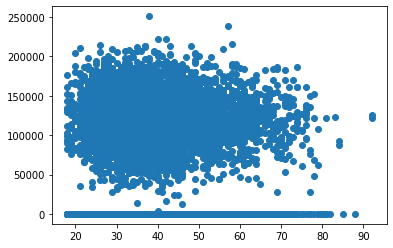

In [27]:
plt.scatter(df.Age,df.Balance)

/opt/anaconda3/envs/pandas/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Tenure vs Exit')

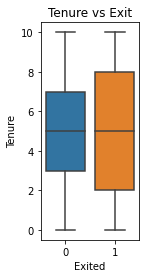

In [29]:
# When customers leave
plt.subplot(1,3,2)
sns.boxplot(df['Exited'], df['Tenure'])
plt.title('Tenure vs Exit')

/opt/anaconda3/envs/pandas/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Tenure vs Exit')

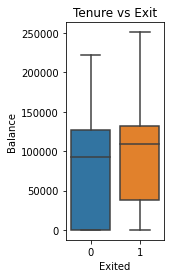

In [31]:
plt.subplot(1,3,2)
sns.boxplot(df['Exited'], df['Balance'])
plt.title('Tenure vs Balance')

Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset')

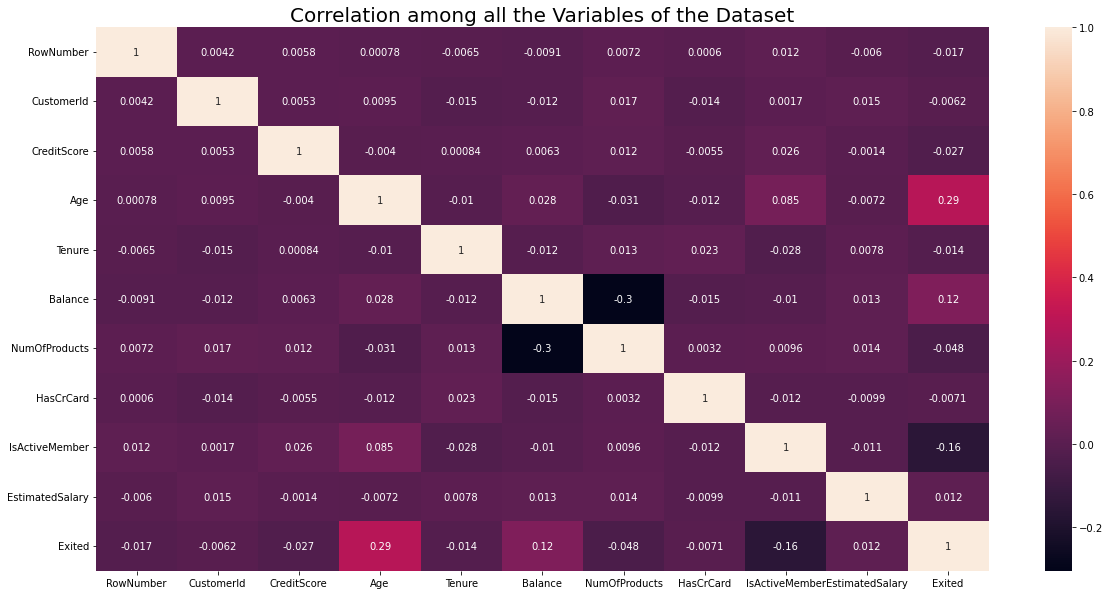

In [34]:
corr = df.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)

Text(0.5, 1.0, 'Graph showing Credit Score and Products')

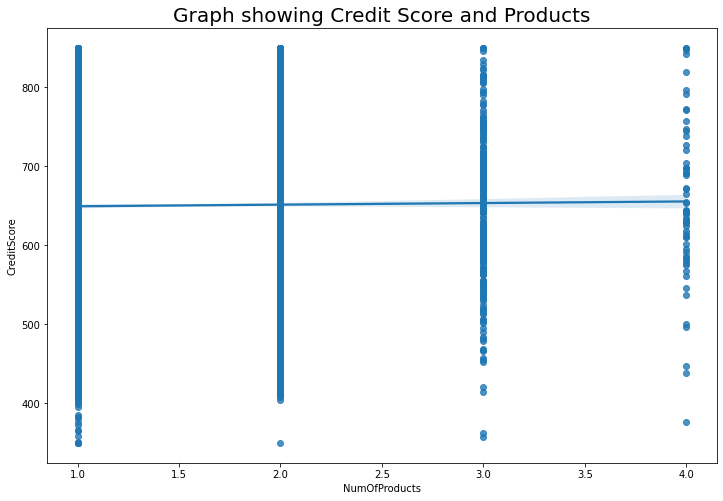

In [43]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=df["NumOfProducts"], y=df["CreditScore"])
plt.title("Graph showing Credit Score and Products", size=20)

<AxesSubplot:xlabel='Tenure', ylabel='Age'>

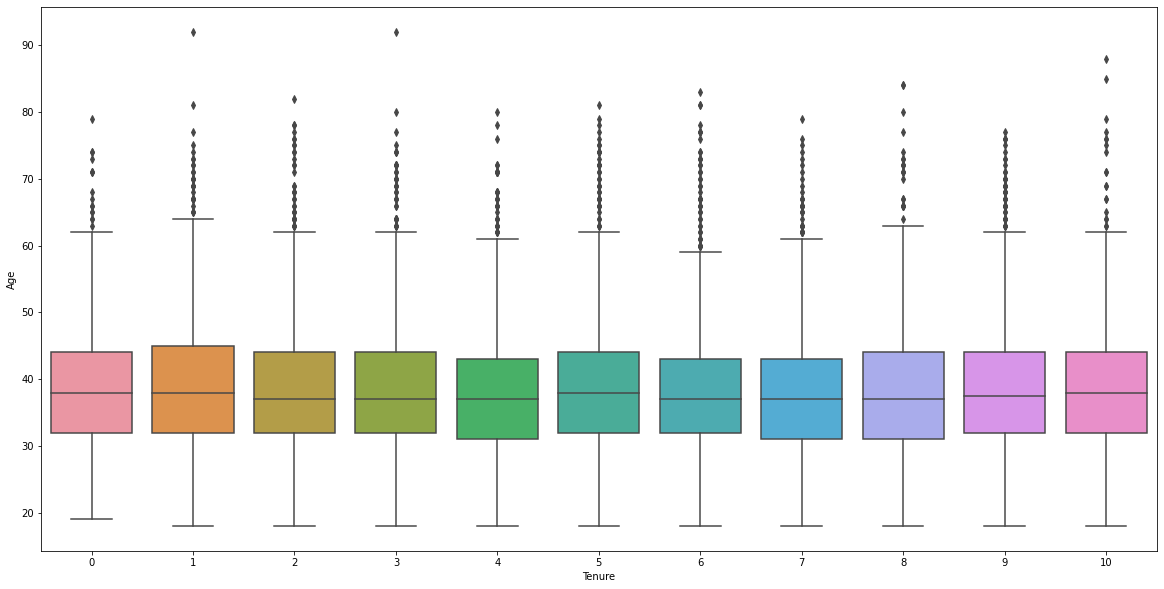

In [47]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="Tenure",y="Age",data=df)

# MULTIVARIATE ANALYSIS

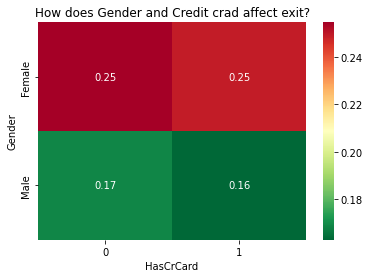

In [51]:
result = pd.pivot_table(data=df, index='Gender', columns='HasCrCard',values='Exited')
sns.heatmap(result, annot=True, cmap = 'RdYlGn_r').set_title('How does Gender and Credit crad affect exit?')
plt.show()

<Figure size 288x288 with 0 Axes>

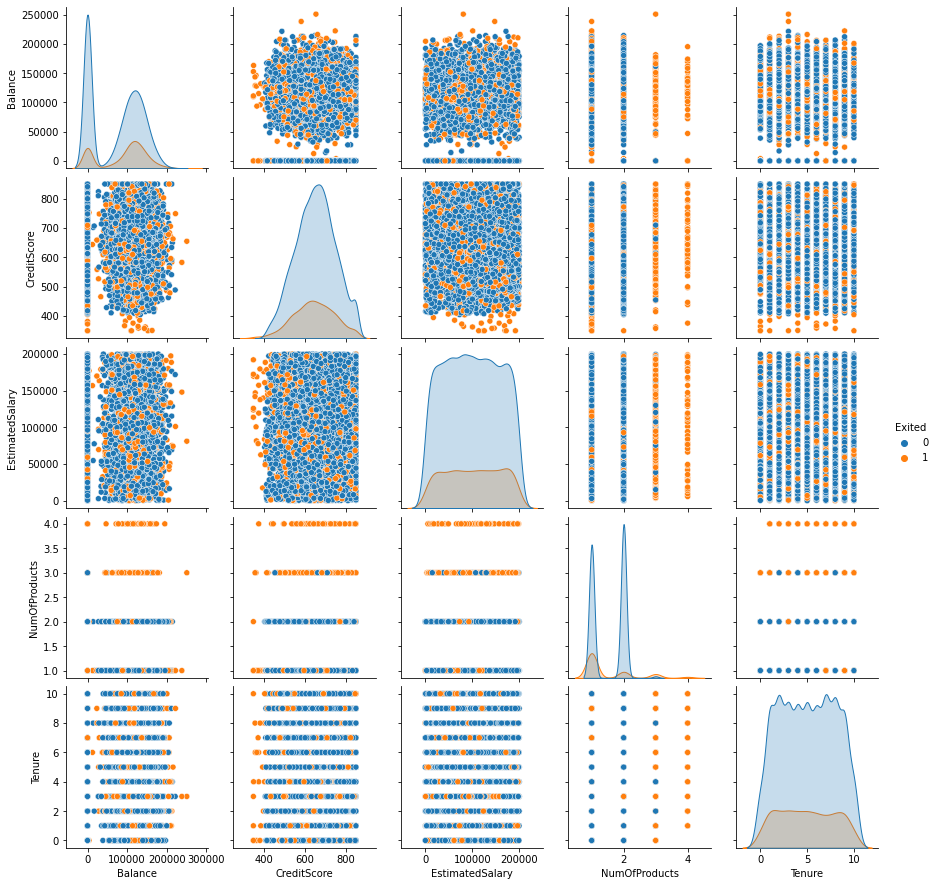

In [49]:
plt.figure(figsize=(4,4))
sns.pairplot(data=df[["Balance","CreditScore","EstimatedSalary","NumOfProducts","Tenure","Exited"]],hue="Exited")

# Descriptive statistics

In [60]:
print("Sum of all ages: ")
print(df['Age'].sum())

Sum of all ages: 
389218


In [64]:
print(df['Balance'].min())
print(df['Balance'].max())
print(df['Balance'].median())
print(df['Balance'].count())
print(df['Balance'].kurt())
print(df['Balance'].skew())


0.0
250898.09
97198.54000000001
10000
-1.489411767941925
-0.14110871094154384


In [55]:
print("Mean")
print(df.mean())
print("\n\nMedian")
print(df.median())

Mean
RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64


Median
RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64


In [63]:
 print(df.cov())

                    RowNumber    CustomerId   CreditScore           Age  \
RowNumber        8.334167e+06  8.725960e+05   1629.568557     23.695370   
CustomerId       8.725960e+05  5.174815e+09  36905.141215   7164.938021   
CreditScore      1.629569e+03  3.690514e+04   9341.860157     -4.019150   
Age              2.369537e+01  7.164938e+03     -4.019150    109.994084   
Tenure          -5.422722e+01 -3.096345e+03      0.235355     -0.303229   
Balance         -1.633226e+06 -5.574297e+07  37804.076998  18525.333354   
NumOfProducts    1.216772e+01  7.101372e+02      0.687999     -0.187157   
HasCrCard        7.879288e-01 -4.599040e+02     -0.240492     -0.056036   
IsActiveMember   1.737839e+01  5.986129e+01      1.239139      0.448026   
EstimatedSalary -9.942442e+05  6.317611e+07  -7694.701048  -4343.372926   
Exited          -1.926838e+01 -1.810269e+02     -1.054722      1.205250   

                      Tenure       Balance  NumOfProducts   HasCrCard  \
RowNumber         -54.2272

In [65]:
#Missing VALUES 
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


/opt/anaconda3/envs/pandas/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Balance'>

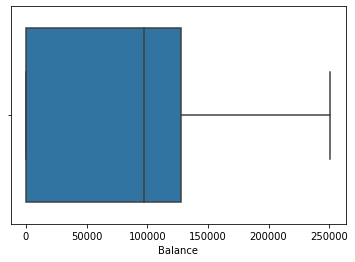

In [66]:
sns.boxplot(df['Balance'])

In [67]:
#Find outliers & replace the outliers
print(np.where(df['Balance']>100000))

(array([   2,    4,    5, ..., 9987, 9993, 9999]),)


In [89]:
#Check for categorical columns & performs encoding
from sklearn.preprocessing import LabelEncoder
df['Gender'].unique()

array([2736, 3258, 2104, ...,  717, 4656, 2497])

In [91]:
encoding=LabelEncoder()
df["Gender"]=encoding.fit_transform(df.iloc[:,4].values)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,2,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [92]:
#Split the data into Dependent & Independent Variables
print("--Dependent Variables-")
X=df.iloc[:,4:7]
print(X)

print("-Independent Variables--")
Y=df.iloc[:,3]
print(Y)


--Dependent Variables-
      Geography  Gender  Age
0             0       0   42
1             2       2   41
2             0       0   42
3             0       0   39
4             2       2   43
...         ...     ...  ...
9995          0       0   39
9996          0       0   35
9997          0       0   36
9998          1       1   42
9999          0       0   28

[10000 rows x 3 columns]
-Independent Variables--
0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64


In [93]:
#Scale the independent Variables
x = df.iloc[:,6:7]
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
print(x_scaled)

[[ 0.29351742]
 [ 0.19816383]
 [ 0.29351742]
 ...
 [-0.27860412]
 [ 0.29351742]
 [-1.04143285]]


In [94]:
#Split the data into training & testing
from sklearn.model_selection import train_test_split

In [95]:
#Split the data into training & testing
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=4,random_state=4)

In [96]:
x_train

,Age
2558,30
7642,40
8912,24
3319,35
6852,37
...,...
456,33
6017,34
709,34
8366,41


In [97]:
x_test

,Age
1603,36
8713,40
4561,31
6600,36


In [98]:
y_train

2558    727
7642    811
8912    623
3319    430
6852    600
       ... 
456     733
6017    487
709     686
8366    637
1146    614
Name: CreditScore, Length: 9996, dtype: int64

In [99]:
y_test

1603    576
8713    786
4561    562
6600    505
Name: CreditScore, dtype: int64